# Plotting

In [1]:
import pandas as pd
import numpy as np
from taigapy import create_taiga_client_v3
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import statsmodels.api as sm

In [2]:
model_df = pd.read_csv("models_depmap2024.tsv", sep="\t", index_col=0)
rnaseq_df = pd.read_csv("rnaseq_depmap2024.tsv", sep="\t", index_col=0)

In [3]:
model_df.head(n=10)

,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,RRID,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,CVCL_0465,...,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,Available in SRA,NaN,2201.0,SIDM00105,905933.0
ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",CVCL_0002,...,NaN,NaN,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,55.0,SIDM00829,905938.0
ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,CVCL_0025,...,NaN,NaN,NaN,CACO2_LARGE_INTESTINE,NaN,Available in SRA,NaN,NaN,SIDM00891,NaN
ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",CVCL_0001,...,NaN,NaN,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,783.0,SIDM00594,907053.0
ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,CVCL_2481,...,NaN,NaN,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,NaN,SIDM00593,NaN
ACH-000006,PT-ej13Dz,MONO-MAC-6,MONOMAC6,AMOL,Myeloid,Acute Myeloid Leukemia,Acute Monoblastic/Monocytic Leukemia,AMOL,"KMT2A-MLLT3, TP53 Arg273His",CVCL_1426,...,NaN,NaN,NaN,MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,2167.0,SIDM01023,908148.0
ACH-000007,PT-NOXwpH,LS513,LS513,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,CVCL_1386,...,NaN,NaN,NaN,LS513_LARGE_INTESTINE,NaN,Available in SRA,NaN,569.0,SIDM00677,907795.0
ACH-000008,PT-fp8PeY,A101D,A101D,MEL,Skin,Melanoma,Melanoma,MEL,NaN,CVCL_1057,...,NaN,NaN,NaN,A101D_SKIN,NaN,Available in SRA,NaN,1806.0,SIDM00801,910921.0
ACH-000009,PT-puKIyc,C2BBe1,C2BBE1,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,CVCL_1096,...,NaN,NaN,NaN,C2BBE1_LARGE_INTESTINE,NaN,Available in SRA,NaN,2104.0,SIDM01233,910700.0


In [4]:
rnaseq_df.head(n=10)

,TFE3 (7030),MMADHC (27249),PABPC1L (80336),RELL2 (285613),GPT (2875),GUSB (2990),H4-16 (121504),DDB2 (1643),RPS4X (6191),HINFP (25988),...,OR2A42 (402317),HOXB7 (3217),NSA2 (10412),UGT2B11 (10720),ZNF747 (65988),NAA60 (79903),MYH4 (4622),MTAP (4507),C14orf93 (60686),NR3C2 (4306)
ACH-000873,3.607691,3.531071,4.982285,2.326016,0.607679,5.118549,1.282028,4.512297,10.075438,2.954654,...,0.042564,3.870581,5.178480,-0.007723,2.005498,4.213717,-0.001724,3.904800,2.190931,0.203910
ACH-000860,4.192566,6.865682,4.853288,2.725583,0.197016,5.666426,1.154470,4.306808,10.215240,4.096901,...,0.031621,-0.005897,6.749713,-0.007723,1.393644,4.334535,-0.001724,4.812949,3.366939,0.370726
ACH-000439,3.265517,5.804615,1.777636,4.185835,0.389025,6.593342,0.410244,4.411381,11.644890,4.744030,...,-0.013226,-0.033868,6.877322,1.596383,3.143557,4.624226,-0.001724,4.122929,2.197136,0.015412
ACH-000318,3.705500,5.813170,4.536005,2.290409,0.471169,5.160089,2.325673,5.017968,9.163992,2.578735,...,-0.013226,3.051092,5.610027,-0.007723,2.334419,3.881219,-0.001724,0.394778,3.217293,0.277760
ACH-001142,6.105227,7.051513,4.457555,2.543055,0.022363,4.589966,2.369987,4.105131,10.179188,3.795200,...,0.053402,3.582671,7.416571,-0.007723,2.294077,4.889203,-0.001724,4.379944,2.355443,0.520338
ACH-000789,3.610912,6.427401,4.756976,4.364494,0.929382,4.866418,3.438092,3.507873,9.286231,4.121232,...,0.020573,4.952951,6.594739,0.006466,4.907597,4.739785,-0.001724,4.911818,3.855860,1.852901
ACH-000544,2.446179,5.885347,2.603382,2.392491,0.112811,3.969176,0.294144,3.547640,8.935704,1.989794,...,-0.001848,3.175952,6.446339,0.006466,1.173540,3.552251,-0.001724,3.890611,2.318863,0.057915
ACH-000531,5.681865,6.781293,1.889260,2.070912,-0.009340,4.449645,0.592160,5.038112,9.719578,2.800874,...,0.053402,4.478511,6.610317,-0.007723,2.051831,4.360793,-0.001724,3.643557,1.962670,2.178547
ACH-000695,4.364434,6.502812,3.187749,3.921761,0.633240,6.154893,1.969617,5.352445,10.147587,4.451670,...,-0.013226,4.133509,6.284287,-0.007723,3.221092,5.393965,-0.001724,4.974483,4.300053,0.846391
ACH-000399,4.619134,6.828655,5.524087,2.794511,1.020185,6.809543,2.244452,5.376555,8.473539,4.868779,...,-0.013226,4.940534,5.303186,-0.007723,3.608505,5.829421,-0.001724,4.590654,3.979446,0.112717


In [5]:
# Note here that map is like apply but you use map for a Series (which is like a vector in R) whereas apply is used for Data.Frame
rnaseq_df.columns = rnaseq_df.columns.map(lambda x: x.split(" ")[0])

In [6]:
rnaseq_df.head(n=10)

,TFE3,MMADHC,PABPC1L,RELL2,GPT,GUSB,H4-16,DDB2,RPS4X,HINFP,...,OR2A42,HOXB7,NSA2,UGT2B11,ZNF747,NAA60,MYH4,MTAP,C14orf93,NR3C2
ACH-000873,3.607691,3.531071,4.982285,2.326016,0.607679,5.118549,1.282028,4.512297,10.075438,2.954654,...,0.042564,3.870581,5.178480,-0.007723,2.005498,4.213717,-0.001724,3.904800,2.190931,0.203910
ACH-000860,4.192566,6.865682,4.853288,2.725583,0.197016,5.666426,1.154470,4.306808,10.215240,4.096901,...,0.031621,-0.005897,6.749713,-0.007723,1.393644,4.334535,-0.001724,4.812949,3.366939,0.370726
ACH-000439,3.265517,5.804615,1.777636,4.185835,0.389025,6.593342,0.410244,4.411381,11.644890,4.744030,...,-0.013226,-0.033868,6.877322,1.596383,3.143557,4.624226,-0.001724,4.122929,2.197136,0.015412
ACH-000318,3.705500,5.813170,4.536005,2.290409,0.471169,5.160089,2.325673,5.017968,9.163992,2.578735,...,-0.013226,3.051092,5.610027,-0.007723,2.334419,3.881219,-0.001724,0.394778,3.217293,0.277760
ACH-001142,6.105227,7.051513,4.457555,2.543055,0.022363,4.589966,2.369987,4.105131,10.179188,3.795200,...,0.053402,3.582671,7.416571,-0.007723,2.294077,4.889203,-0.001724,4.379944,2.355443,0.520338
ACH-000789,3.610912,6.427401,4.756976,4.364494,0.929382,4.866418,3.438092,3.507873,9.286231,4.121232,...,0.020573,4.952951,6.594739,0.006466,4.907597,4.739785,-0.001724,4.911818,3.855860,1.852901
ACH-000544,2.446179,5.885347,2.603382,2.392491,0.112811,3.969176,0.294144,3.547640,8.935704,1.989794,...,-0.001848,3.175952,6.446339,0.006466,1.173540,3.552251,-0.001724,3.890611,2.318863,0.057915
ACH-000531,5.681865,6.781293,1.889260,2.070912,-0.009340,4.449645,0.592160,5.038112,9.719578,2.800874,...,0.053402,4.478511,6.610317,-0.007723,2.051831,4.360793,-0.001724,3.643557,1.962670,2.178547
ACH-000695,4.364434,6.502812,3.187749,3.921761,0.633240,6.154893,1.969617,5.352445,10.147587,4.451670,...,-0.013226,4.133509,6.284287,-0.007723,3.221092,5.393965,-0.001724,4.974483,4.300053,0.846391
ACH-000399,4.619134,6.828655,5.524087,2.794511,1.020185,6.809543,2.244452,5.376555,8.473539,4.868779,...,-0.013226,4.940534,5.303186,-0.007723,3.608505,5.829421,-0.001724,4.590654,3.979446,0.112717


In [7]:
variable_genes = rnaseq_df.var().sort_values(ascending=False)[:1000].index

In [56]:
rnaseq_df.var().sort_values(ascending=False)[:1000].index

Index(['SPARC', 'KRT19', 'FN1', 'C19orf33', 'TGFBI', 'RPS4Y1', 'UCHL1', 'VIM',
       'KRT7', 'KRT8',
       ...
       'NCF4', 'NXN', 'STAP2', 'PROS1', 'APOBEC3G', 'ACP5', 'GAS7', 'KLF4',
       'CDKN1A', 'P4HA2'],
      dtype='object', length=1000)

In [8]:
rnaseq_df = rnaseq_df.loc[:,variable_genes]

In [9]:
joint_df = rnaseq_df.join(model_df[["OncotreeLineage"]], how = "left")

In [10]:
pca = sm.PCA(joint_df[variable_genes], ncomp=2)

In [11]:
pca_df = pca.factors

In [12]:
pca_df = pca_df.join(model_df[["OncotreeLineage"]], how="left")

In [13]:
# enumerate basically gives both the row index and the element being looped over
color_map = {lineage: i for i, lineage in enumerate(pca_df["OncotreeLineage"].unique())}
color_map

{'Esophagus/Stomach': 0,
 'Lung': 1,
 'Myeloid': 2,
 'CNS/Brain': 3,
 'Fibroblast': 4,
 'Uterus': 5,
 'Peripheral Nervous System': 6,
 'Bone': 7,
 'Kidney': 8,
 'Lymphoid': 9,
 'Bladder/Urinary Tract': 10,
 'Liver': 11,
 'Ovary/Fallopian Tube': 12,
 'Bowel': 13,
 'Skin': 14,
 'Pancreas': 15,
 'Breast': 16,
 'Ampulla of Vater': 17,
 'Head and Neck': 18,
 'Prostate': 19,
 'Thyroid': 20,
 'Pleura': 21,
 'Biliary Tract': 22,
 'Soft Tissue': 23,
 'Cervix': 24,
 'Embryonal': 25,
 'Eye': 26,
 nan: 27,
 'Vulva/Vagina': 28,
 'Other': 29,
 'Muscle': 30,
 'Testis': 31,
 'Adrenal Gland': 32,
 'Hair': 33}

In [57]:
enumerate(pca_df["OncotreeLineage"].unique())

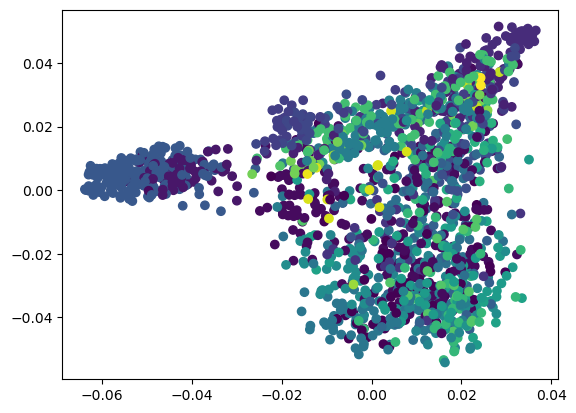

In [14]:
plt.scatter(pca_df["comp_0"],pca_df["comp_1"], 
            c=pca_df["OncotreeLineage"].map(color_map))

In [15]:
brain_pca_df = pca_df.loc[pca_df["OncotreeLineage"]=="CNS/Brain",:]
nonbrain_pca_df = pca_df.loc[pca_df["OncotreeLineage"]!="CNS/Brain",:]

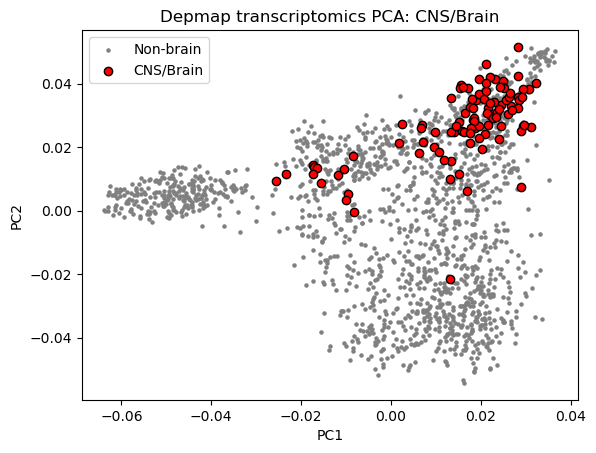

In [16]:
plt.scatter(nonbrain_pca_df["comp_0"],nonbrain_pca_df["comp_1"], color="gray", label="Non-brain", s=5)
plt.scatter(brain_pca_df["comp_0"],brain_pca_df["comp_1"], color="red", label="CNS/Brain", edgecolors="black")
plt.title("Depmap transcriptomics PCA: CNS/Brain")
plt.xlabel("PC1")
plt.ylabel("PC2")
#plt.xticks([])
#plt.yticks([])
plt.legend()

In [45]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Arial"
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['figure.dpi'] = 100

# Matplotlib subplots

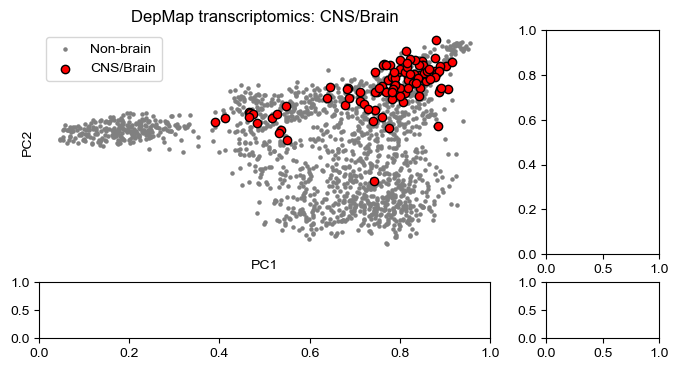

In [46]:
fig, axs = plt.subplots(2, 2, width_ratios = [0.8, 0.2],
                                height_ratios = [0.8, 0.2])

pca_ax = axs [0,0]
pca_ax.scatter(nonbrain_pca_df["comp_0"],nonbrain_pca_df["comp_1"], color="gray", label="Non-brain", s=5)
pca_ax.scatter(brain_pca_df["comp_0"],brain_pca_df["comp_1"], color="red", label="CNS/Brain", edgecolors="black")
pca_ax.set_title("DepMap transcriptomics: CNS/Brain")
pca_ax.set_xlabel("PC1")
pca_ax.set_ylabel("PC2")
pca_ax.set_xticks([])
pca_ax.set_yticks([])

pca_ax.spines["top"].set_visible(False)
pca_ax.spines["left"].set_visible(False)
pca_ax.spines["right"].set_visible(False)
pca_ax.spines["bottom"].set_visible(False)
pca_ax.legend()

In [19]:
axs

array([[<Axes: title={'center': 'DepMap transcriptomics: CNS/Brain'}, xlabel='PC1', ylabel='PC2'>,
        <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

# Seaborn

In [20]:
joint_df

,SPARC,KRT19,FN1,C19orf33,TGFBI,RPS4Y1,UCHL1,VIM,KRT7,KRT8,...,NXN,STAP2,PROS1,APOBEC3G,ACP5,GAS7,KLF4,CDKN1A,P4HA2,OncotreeLineage
ACH-000873,0.837729,8.975399,5.021780,6.294583,7.362137,7.352594,8.506367,4.016311,2.990821,8.599381,...,4.942177,3.470370,2.132970,0.217277,0.313823,1.139417,3.445992,4.369613,5.837542,Esophagus/Stomach
ACH-000860,1.306335,9.315365,7.111923,8.057272,9.815371,8.139684,5.667177,7.073591,9.751536,9.769989,...,2.021363,4.308319,2.727327,0.269239,3.407135,0.143366,4.385773,3.604127,5.045666,Lung
ACH-000439,8.815292,-0.196002,0.954418,-0.171422,0.461725,8.697629,0.405518,8.750925,0.703107,2.660447,...,0.064426,2.880118,0.110890,4.045792,0.288666,1.717993,-0.177017,2.472430,0.453488,Myeloid
ACH-000318,3.271206,9.572499,7.845696,9.562125,8.630944,1.597513,4.370711,7.372734,6.376955,10.091135,...,3.874254,4.711089,0.421650,2.215249,2.807343,0.860769,4.075018,5.493807,4.342597,Esophagus/Stomach
ACH-001142,11.253107,6.045606,13.988426,4.056279,10.275837,8.558051,9.252441,12.612595,7.129454,4.124124,...,5.843684,1.820543,3.470728,3.103390,-0.048574,0.014334,3.220961,4.316639,5.754015,CNS/Brain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001843,7.593528,1.322335,10.404217,0.806968,9.117007,0.270069,0.537329,12.531562,1.377653,5.822044,...,5.051686,1.144116,4.896240,3.132840,4.070016,-0.009493,1.886259,7.731751,5.129553,Biliary Tract
ACH-002074,1.745961,7.813189,7.280556,1.837481,1.697652,8.329645,9.663483,2.897507,4.309542,9.381448,...,3.138975,2.048799,0.182742,2.148075,0.488892,0.192384,3.220644,5.153898,3.812999,Lung
ACH-001164,9.331850,2.066002,9.484334,1.524871,6.135380,9.360992,5.257316,10.204294,1.707291,5.582136,...,4.515085,3.891821,2.975524,2.025273,2.045299,1.299107,1.666447,6.190464,4.248093,Soft Tissue
ACH-003180,9.977009,1.309323,10.523127,0.806968,5.385650,0.270069,9.510003,10.014274,4.786670,4.171443,...,6.042834,3.336063,4.677342,0.232506,1.451024,0.204068,4.704354,7.740433,6.244124,Soft Tissue


Text(0.5, 1.0, 'Expression of CDKN2A by lineage')

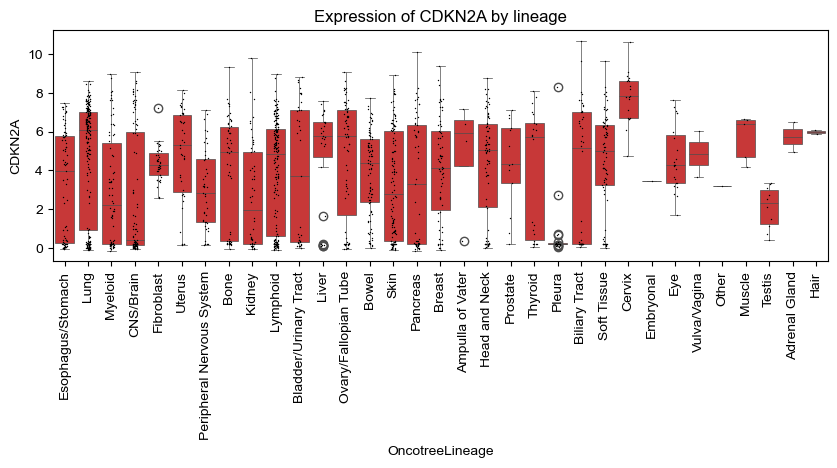

In [47]:
plt.figure(figsize=(10, 3))
sns.boxplot(joint_df, x="OncotreeLineage", y="CDKN2A", color="#DF2020", linewidth=0.5)
sns.stripplot(joint_df, x="OncotreeLineage", y="CDKN2A", s=1, color="black")
plt.xticks(rotation="vertical")
plt.title("Expression of CDKN2A by lineage")

In [22]:
# Getting column names that have a name element like CDK
[g for g in joint_df.columns if "CDK" in g]

['CDKN2A', 'CDKN1A']

In [23]:
joint_df["CDKN1A"]

ACH-000873    4.369613
ACH-000860    3.604127
ACH-000439    2.472430
ACH-000318    5.493807
ACH-001142    4.316639
                ...   
ACH-001843    7.731751
ACH-002074    5.153898
ACH-001164    6.190464
ACH-003180    7.740433
ACH-001979    7.631478
Name: CDKN1A, Length: 1673, dtype: float64

In [39]:
medians_CDKN1A = joint_df.groupby(["OncotreeLineage"]).agg({"CDKN1A": ['median']})
medians2_CDKN1A = medians_CDKN1A.sort_values(by=("CDKN1A", "median"), ascending = False)

In [41]:
medians_CDKN2A = joint_df.groupby(["OncotreeLineage"]).agg({"CDKN2A": ['median']})
medians2_CDKN2A = medians_CDKN2A.sort_values(by=("CDKN2A", "median"), ascending = False)

Text(0.5, 1.0, 'Expression of CDKN2A by lineage')

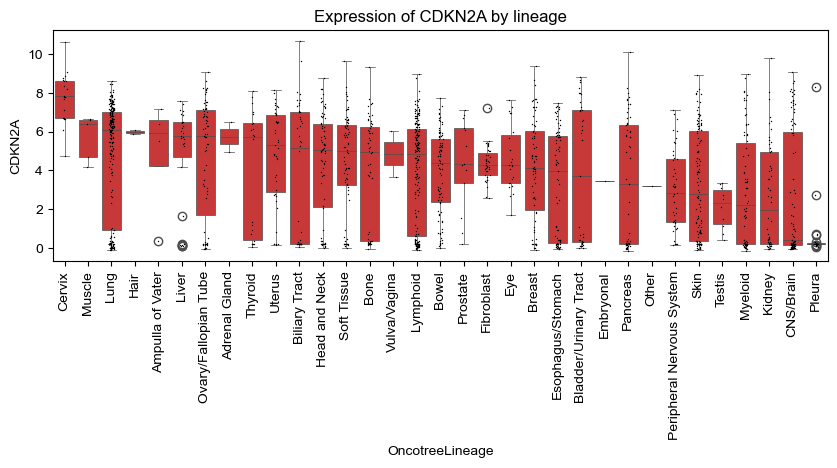

In [48]:
plt.figure(figsize=(10, 3))
sns.boxplot(joint_df, x="OncotreeLineage", y="CDKN2A", color="#DF2020", linewidth=0.5, order = medians2_CDKN2A.index)
sns.stripplot(joint_df, x="OncotreeLineage", y="CDKN2A", s=1, color="black")
plt.xticks(rotation="vertical")
plt.title("Expression of CDKN2A by lineage")

In [53]:
def gene_expression_boxplot(df, gene, output_file):
    medians = joint_df.groupby(["OncotreeLineage"]).agg({gene: ['median']})
    medians2 = medians.sort_values(by=(gene, "median"), ascending = False)

    plt.figure(figsize=(10, 3))
    sns.boxplot(joint_df, x="OncotreeLineage", y=gene, color="#DF2020", linewidth=0.5, order = medians2.index)
    sns.stripplot(joint_df, x="OncotreeLineage", y=gene, s=1, color="black")
    plt.xticks(rotation="vertical")
    plt.title(f"Expression of {gene} by lineage")

    plt.savefig(output_file)

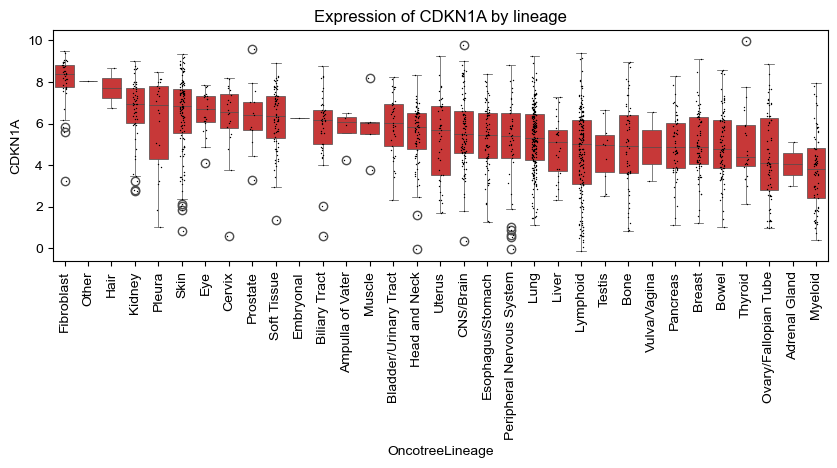

In [54]:
gene_expression_boxplot(joint_df, "CDKN1A", "CDKN1A boxplot.pdf")

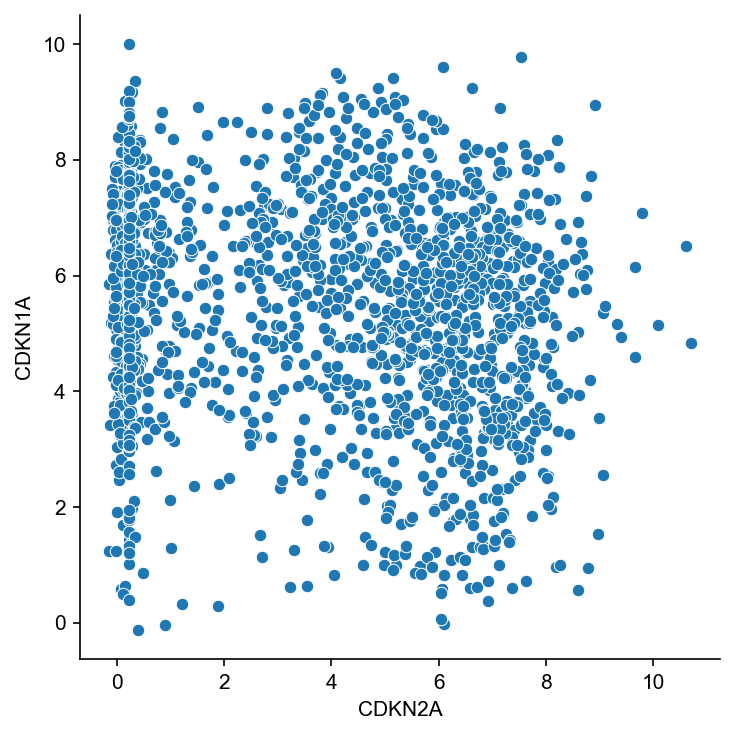

In [28]:
sns.relplot(joint_df, x="CDKN2A",y="CDKN1A")

# Plotly

In [29]:
import plotly_express as px

In [31]:
fig = px.scatter(pca_df, x="comp_0", y="comp_1", color="OncotreeLineage")
fig.write_html("depmappca.html")